# Iris Flower Dataset Neural Network 
##### **A Statquest implementation of [Neural Networks Pt. 4: Multiple Inputs and Outputs](https://www.youtube.com/watch?v=83LYR-1IcjA&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=9)**


![iris_dataset image.png](<./iris_dataset image.png>)

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('IRIS.csv')
iris = iris.drop(columns=["sepal_length", "petal_length"])
iris["species"] = iris["species"].str.replace("Iris-", "")
# Print 3 examples of each species
for s in iris["species"].unique():
    print(f"\n{s}:")
    print(iris[iris["species"] == s].head(3))
    print("-" * 50)


setosa:
   sepal_width  petal_width species
0          3.5          0.2  setosa
1          3.0          0.2  setosa
2          3.2          0.2  setosa
--------------------------------------------------

versicolor:
    sepal_width  petal_width     species
50          3.2          1.4  versicolor
51          3.2          1.5  versicolor
52          3.1          1.5  versicolor
--------------------------------------------------

virginica:
     sepal_width  petal_width    species
100          3.3          2.5  virginica
101          2.7          1.9  virginica
102          3.0          2.1  virginica
--------------------------------------------------


In [3]:
sample_dataset = [iris.iloc[0], iris.iloc[1], iris.iloc[2],
                  iris.iloc[50], iris.iloc[51], iris.iloc[52],
                  iris.iloc[100], iris.iloc[101], iris.iloc[102]]
sample_dataset = pd.DataFrame(sample_dataset)
print("Indices of sample_dataset:", sample_dataset.index)
print(sample_dataset)

Indices of sample_dataset: Index([0, 1, 2, 50, 51, 52, 100, 101, 102], dtype='int64')
     sepal_width  petal_width     species
0            3.5          0.2      setosa
1            3.0          0.2      setosa
2            3.2          0.2      setosa
50           3.2          1.4  versicolor
51           3.2          1.5  versicolor
52           3.1          1.5  versicolor
100          3.3          2.5   virginica
101          2.7          1.9   virginica
102          3.0          2.1   virginica


In [4]:
# input nodes
petal_width = iris["petal_width"].values
sepal_width = iris["sepal_width"].values

# Combine petal_width and sepal_width into a 2D array
X = np.column_stack((petal_width, sepal_width)) 


# output nodes
species = iris["species"].values
label_encoder = LabelEncoder()
# output nodes encoded as integers, setosa = 0, versicolor = 1, virginica = 2
species_encoded = label_encoder.fit_transform(species) 
y = species_encoded
print(y) 
print("\n" + "="* 80)
# print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



In [30]:
# Normalize the input features 0 to 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# print(X)

In [6]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# print(X_tensor)
# print(y_tensor)

### Standard Implementation of a Simple Model Architecture

In [7]:
class IrirsNetSimple(nn.Module):
    def __init__(self, input_size=2, hidden_size=2, output_size=3):
        super(IrirsNetSimple, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

##### The test tensor is used to explain diffrent functions used in the ReLU and what it does

In [ ]:
test_tensor = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]], dtype=torch.float32)
empty = torch.empty_like(test_tensor)
"""Fun Note:
The function torch.empty_like doesn't actually set values to zero—it
simply allocates memory for a tensor of the same shape and datatype,
leaving the contents uninitialized. This means that the tensor will
contain whatever values happen to be in that chunk of memory, which
can appear as random numbers. If you need a tensor initialized with
zeros, use torch.zeros_like instead."""
test_tensor_flatten = test_tensor.flatten()  # Flatten to 1D tensor
test_tensor_view = test_tensor_flatten.view(2,3)  # Reshape to 2D tensor(2,3 is orginal shape)
print("empty shape:", empty.shape)
print("empty:", empty)
print("="*80)
print("test_tensor shape:", test_tensor.shape)
print("test_tensor:", test_tensor)
print("="*80)
print("test_tensor_flatten shape:", test_tensor_flatten.shape)
print("test_tensor_flatten:", test_tensor_flatten)
print("="*80)
print("test_tensor_view shape:", test_tensor_view.shape)
print("test_tensor_view:", test_tensor_view)


empty shape: torch.Size([2, 3])
empty: tensor([[ 9.3442e+18,  4.1536e-41, -2.0199e+23],
        [ 3.3022e-41,  1.3207e+03,  4.1534e-41]])
test_tensor shape: torch.Size([2, 3])
test_tensor: tensor([[1., 2., 3.],
        [4., 5., 6.]])
test_tensor_flatten shape: torch.Size([6])
test_tensor_flatten: tensor([1., 2., 3., 4., 5., 6.])
test_tensor_view shape: torch.Size([2, 3])
test_tensor_view: tensor([[1., 2., 3.],
        [4., 5., 6.]])


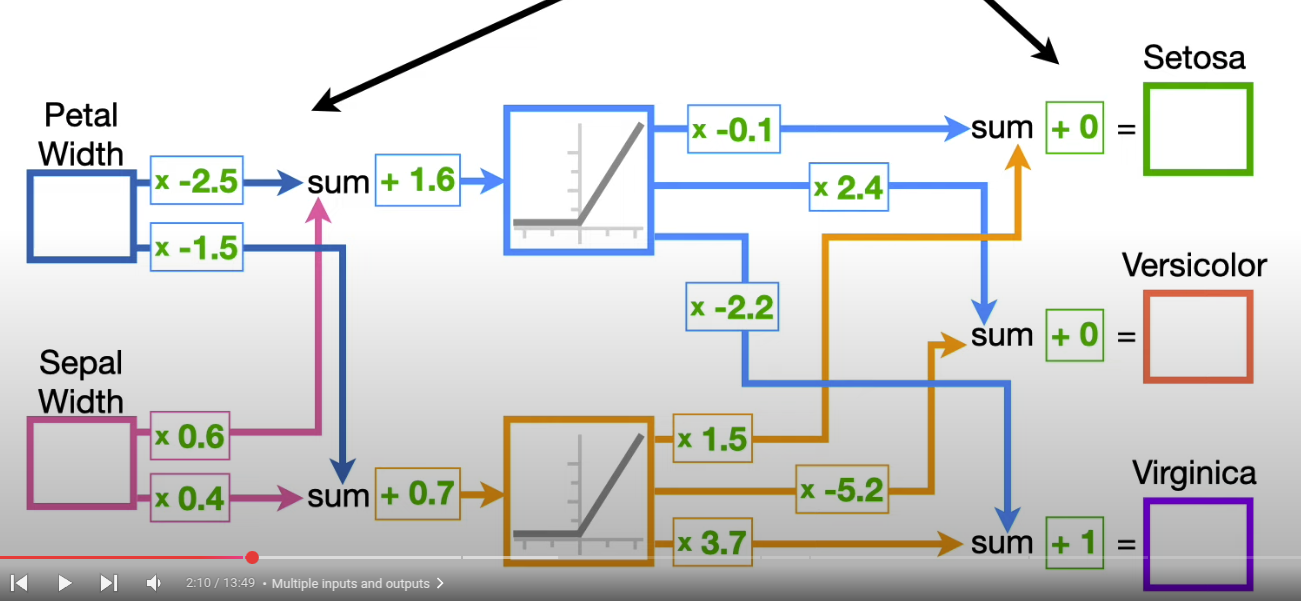

In [ ]:
# Define the neural network
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        # Initialize weights and biases for our custom linear layers

        self.weights1 = nn.Parameter(torch.tensor([
            [-2.5,  0.6],   # Hidden neuron 1
            [-1.5,  0.4]    # Hidden neuron 2
        ], dtype=torch.float32))

        self.bias1 = nn.Parameter(torch.tensor([1.6, 0.7], dtype=torch.float32))
        
        self.weights2 = nn.Parameter(torch.tensor([
            [-0.1,  1.5],
            [2.4,  -5.2],
            [ -2.2, 3.7]
        ], dtype=torch.float32))
        
        self.bias2 = nn.Parameter(torch.tensor([0.0,0.0, 1.0], dtype=torch.float32))
    
    def custom_relu(self, x):
        """Custom implementation of ReLU activation function"""
        result = torch.empty_like(x) # Create an empty tensor with the same shape as x
        # Flatten both the tensors to 1D (A vector)
        x_flat = x.flatten()
        result_flat = result.flatten()
        # Iterate manually over each element
        for i in range(x_flat.size(0)):
            # If the element is positive, keep it; otherwise, set it to 0.
            result_flat[i] = x_flat[i] if x_flat[i] > 0 else 0.0
         
        # Reshape the result back to the original shape
        result = result_flat.view(x.shape)
        
        return result
    
    def custom_linear(self, x, weights, bias):
        """Custom implementation of linear transformation"""
        ## If you want to see the values for each step of the calculation, uncomment the print statements below
        print("x shape:", x)
        print("weights values:", weights)
        print("bias values:", bias)
        output_res = torch.matmul(x, weights.t()) + bias
        print("output_res shape:", output_res)
        print("-"*80)
        return output_res
    
    def forward(self, x):
        # First layer with custom linear and ReLU
        print("linear layer 1")
        x = self.custom_linear(x, self.weights1, self.bias1)
        print("ReLU activation")
        print("input of x before ReLU:", x)
        x = self.custom_relu(x)
        print("output of x after ReLU:", x)  
        print("linear layer 2")
        # Second layer with custom linear
        x = self.custom_linear(x, self.weights2, self.bias2)
        return x


In [66]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = IrisNet().to(device)

In [67]:
X_sample = np.column_stack((sample_dataset["petal_width"].values,
                            sample_dataset["sepal_width"].values))
y_sample = sample_dataset["species"].values
label_encoder = LabelEncoder()
y_sample_encoded = label_encoder.fit_transform(y_sample)

X_sample = scaler.fit_transform(X_sample)

X_sample_tensor = torch.tensor(X_sample, dtype=torch.float32)
y_sample_tensor = torch.tensor(y_sample_encoded, dtype=torch.long)

print("X_sample_tensor:", X_sample_tensor)
print("y_sample_tensor:", y_sample_tensor)

X_sample_tensor: tensor([[0.0000, 1.0000],
        [0.0000, 0.3750],
        [0.0000, 0.6250],
        [0.5217, 0.6250],
        [0.5652, 0.6250],
        [0.5652, 0.5000],
        [1.0000, 0.7500],
        [0.7391, 0.0000],
        [0.8261, 0.3750]])
y_sample_tensor: tensor([0, 0, 0, 1, 1, 1, 2, 2, 2])


In [68]:
with torch.no_grad():
    X_sample_tensor = X_sample_tensor.to(device)
    y_pred = model(X_sample_tensor).cpu()
    print("Predictions:")
    print(y_pred)
    print("Predictions shape:", y_pred.shape)
    # Convert predictions to labels using argmax
    _, predicted_labels = torch.max(y_pred, 1)
    print("Predicted labels:", predicted_labels)
    # Decode the predicted labels back to original species names
    predicted_species = label_encoder.inverse_transform(predicted_labels.numpy())
    print("Predicted species:", predicted_species)

linear layer 1
x shape: tensor([[0.0000, 1.0000],
        [0.0000, 0.3750],
        [0.0000, 0.6250],
        [0.5217, 0.6250],
        [0.5652, 0.6250],
        [0.5652, 0.5000],
        [1.0000, 0.7500],
        [0.7391, 0.0000],
        [0.8261, 0.3750]])
weights values: Parameter containing:
tensor([[-2.5000,  0.6000],
        [-1.5000,  0.4000]], requires_grad=True)
bias values: Parameter containing:
tensor([1.6000, 0.7000], requires_grad=True)
output_res shape: tensor([[ 2.2000,  1.1000],
        [ 1.8250,  0.8500],
        [ 1.9750,  0.9500],
        [ 0.6707,  0.1674],
        [ 0.5620,  0.1022],
        [ 0.4870,  0.0522],
        [-0.4500, -0.5000],
        [-0.2478, -0.4087],
        [-0.2402, -0.3891]])
--------------------------------------------------------------------------------
ReLU activation
input of x before ReLU: tensor([[ 2.2000,  1.1000],
        [ 1.8250,  0.8500],
        [ 1.9750,  0.9500],
        [ 0.6707,  0.1674],
        [ 0.5620,  0.1022],
        [ 0.48

In [12]:
# Create grid and convert to tensor (ensure device is defined)
petal_width_range = np.linspace(0, 1, 50)
sepal_width_range = np.linspace(0, 1, 50)
petal_width_grid, sepal_width_grid = np.meshgrid(petal_width_range, sepal_width_range)
grid = np.column_stack((petal_width_grid.ravel(), sepal_width_grid.ravel()))
grid_tensor = torch.tensor(grid, dtype=torch.float32).to(device)

# Make predictions with your model and compute probabilities
model.eval()
with torch.no_grad():
    logits = model(grid_tensor)
    probabilities = torch.softmax(logits, dim=1).cpu().numpy()

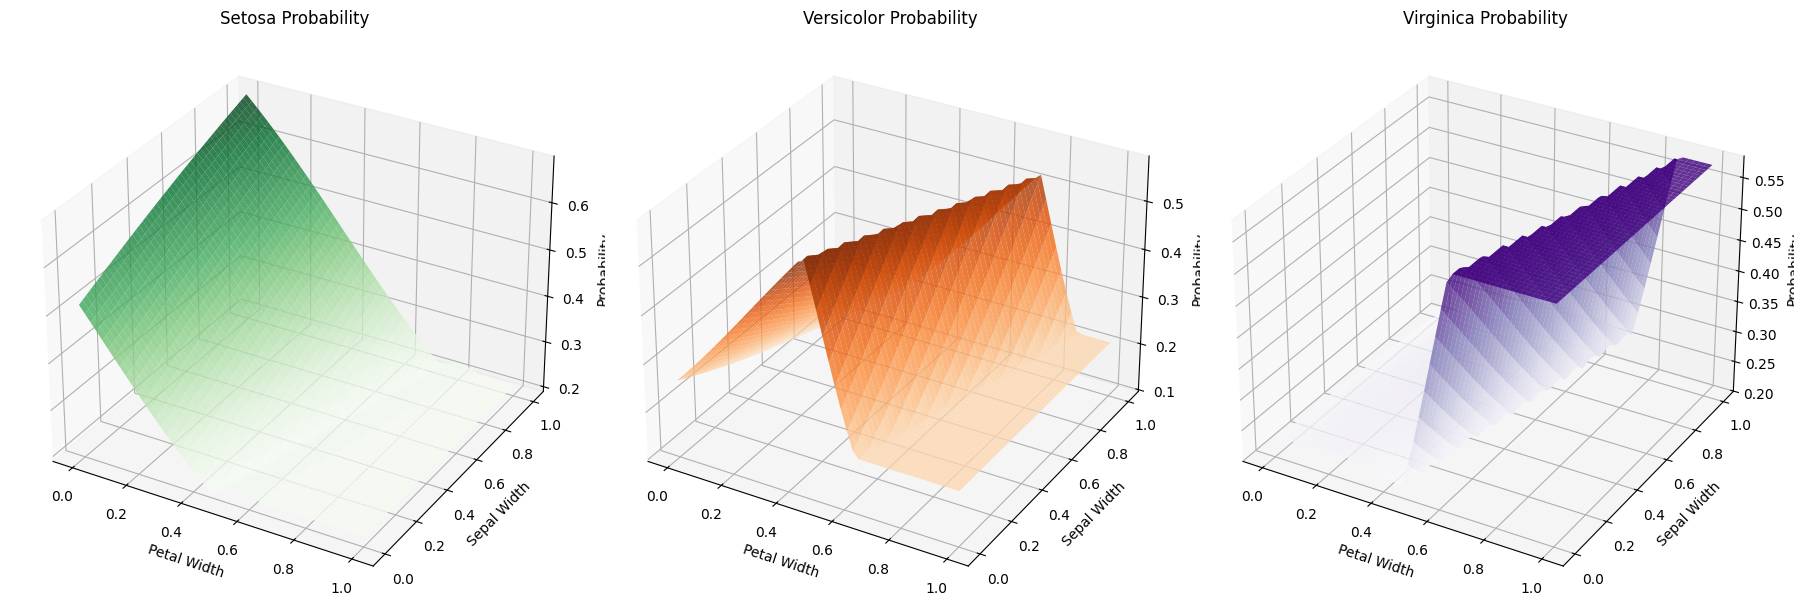

In [13]:
# Reshape probabilities for each class to match the grid shape
prob_setosa = probabilities[:, 0].reshape(petal_width_grid.shape)
prob_versicolor = probabilities[:, 1].reshape(petal_width_grid.shape)
prob_virginica = probabilities[:, 2].reshape(petal_width_grid.shape)

# Plot the 3D surfaces for each class
fig = plt.figure(figsize=(18, 6))

# Create lists for classes, probabilities, and color maps
classes = ['Setosa', 'Versicolor', 'Virginica']
prob_data = [prob_setosa, prob_versicolor, prob_virginica]
cmaps = ['Greens', 'Oranges', 'Purples']

# Create subplots in a loop
for i, (cls, prob, cmap) in enumerate(zip(classes, prob_data, cmaps)):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    surf = ax.plot_surface(petal_width_grid, sepal_width_grid, prob, cmap=cmap, alpha=0.8)
    ax.set_title(f'{cls} Probability')
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Width')
    ax.set_zlabel('Probability')

plt.tight_layout()
plt.show()